<a href="https://colab.research.google.com/github/Sanshiya-23/Applied-Data-Science-Assignment-1/blob/main/Transfer_Learning_for_Image_Classification_21066861.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing from Libraries**

Importing necessary libraries for image classification using TensorFlow and Keras

In [ ]:
# Importing the libraries
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam

# **Loading CIFAR-10 Dataset**

---The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.



In [ ]:
# Load CIFAR-10 data
(x_train_orig, y_train_orig), (x_test_orig, y_test_orig) = cifar10.load_data()


# **DATA PREPROCESING**

The code demonstrates image classification using transfer learning with VGG16 and training a model from scratch on the CIFAR-10 dataset, comparing their learning curves for evaluation



In [ ]:
# Normalize data to the range [0,1]
x_train_norm = x_train_orig.astype('float32') / 255
x_test_norm = x_test_orig.astype('float32') / 255

In [ ]:
# One-hot encode labels
y_train_one_hot = to_categorical(y_train_orig, num_classes=10)
y_test_one_hot = to_categorical(y_test_orig, num_classes=10)

In [ ]:
# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


# **Model Definition and Training**
Model definition involves specifying the architecture and configuration of the neural network models (model_transfer and model_scratch) for transfer learning and training from scratch, respectively.

In [ ]:
# Freeze layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

  # Build a new model on top of the pre-trained model
model_transfer = Sequential()
model_transfer.add(base_model)
model_transfer.add(Flatten())
model_transfer.add(Dense(256, activation='relu'))
model_transfer.add(Dropout(0.5))
model_transfer.add(Dense(10, activation='softmax'))

# Compile the model
model_transfer.compile(optimizer=Adam(learning_rate=0.001),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])


In [ ]:
# Training the transfer learning model
history_transfer = model_transfer.fit(x_train_norm, y_train_one_hot,
                                     validation_split=0.2, batch_size=64, epochs=20)

# Training the model from scratch
history_scratch = model_scratch.fit(x_train_norm, y_train_one_hot,
                                   validation_split=0.2, batch_size=64, epochs=20)
# Training a model from scratch
model_scratch = Sequential()
model_scratch.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model_scratch.add(MaxPool2D(pool_size=(2, 2)))
model_scratch.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model_scratch.add(MaxPool2D(pool_size=(2, 2)))
model_scratch.add(Dropout(0.5))
model_scratch.add(Flatten())
model_scratch.add(Dense(256, activation='relu'))
model_scratch.add(Dropout(0.5))
model_scratch.add(Dense(10, activation='softmax'))

# Compile the model
model_scratch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Epoch 1/20
625/625 [==============================] - 9s 15ms/step - loss: 0.9887 - accuracy: 0.6507 - val_loss: 1.1060 - val_accuracy: 0.6175
Epoch 2/20
625/625 [==============================] - 8s 12ms/step - loss: 0.9790 - accuracy: 0.6547 - val_loss: 1.0991 - val_accuracy: 0.6213
Epoch 3/20
625/625 [==============================] - 9s 15ms/step - loss: 0.9742 - accuracy: 0.6568 - val_loss: 1.1115 - val_accuracy: 0.6221
Epoch 4/20
625/625 [==============================] - 9s 14ms/step - loss: 0.9688 - accuracy: 0.6593 - val_loss: 1.1016 - val_accuracy: 0.6265
Epoch 5/20
625/625 [==============================] - 9s 14ms/step - loss: 0.9558 - accuracy: 0.6629 - val_loss: 1.1154 - val_accuracy: 0.6253
Epoch 6/20
625/625 [==============================] - 8s 13ms/step - loss: 0.9545 - accuracy: 0.6624 - val_loss: 1.1019 - val_accuracy: 0.6262
Epoch 7/20
625/625 [==============================] - 9s 14ms/step - loss: 0.9439 - accuracy: 0.6654 - val_loss: 1.1046 - val_accuracy: 0.6285

# **Evaluation and Predictions**

 Evaluate and predict using Class-wise Performance Metrics: Precision, Recall, F1-Score, and Support

In [ ]:
# Evaluate the model on the test set
model_transfer.evaluate(x_test_norm, y_test_one_hot)

# Predictions
predictions_transfer = model_transfer.predict(x_test_norm)
predicted_labels_transfer = np.argmax(predictions_transfer, axis=1)
actual_label_transfer = np.argmax(y_test_one_hot, axis=1)

313/313 [==============================] - 2s 7ms/step


In [ ]:
# Classification Report
from sklearn import metrics
print(metrics.classification_report(actual_label_transfer, predicted_labels_transfer))


              precision    recall  f1-score   support

           0       0.69      0.70      0.70      1000
           1       0.62      0.73      0.67      1000
           2       0.54      0.52      0.53      1000
           3       0.50      0.34      0.40      1000
           4       0.54      0.59      0.56      1000
           5       0.59      0.49      0.54      1000
           6       0.62      0.68      0.65      1000
           7       0.67      0.68      0.68      1000
           8       0.72      0.75      0.74      1000
           9       0.61      0.67      0.64      1000

    accuracy                           0.62     10000
   macro avg       0.61      0.62      0.61     10000
weighted avg       0.61      0.62      0.61     10000



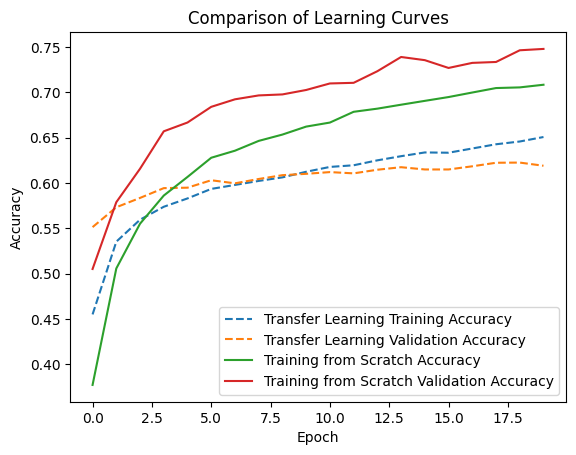

In [ ]:
# Plotting the learning curves
plt.plot(history_transfer.history['accuracy'], label='Transfer Learning Training Accuracy', linestyle='--')
plt.plot(history_transfer.history['val_accuracy'], label='Transfer Learning Validation Accuracy', linestyle='--')
plt.plot(history_scratch.history['accuracy'], label='Training from Scratch Accuracy')
plt.plot(history_scratch.history['val_accuracy'], label='Training from Scratch Validation Accuracy')
plt.title('Comparison of Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()